In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("Output_Data/agent_data.csv")
print(df.head())

   Time_Step  Agent_ID Behavior Microhabitat  Body_Temperature  \
0          0        14      NaN          NaN              25.0   
1          0        29      NaN          NaN              25.0   
2          0        41      NaN          NaN              25.0   
3          0        58      NaN          NaN              25.0   
4          0       106      NaN          NaN              25.0   

   Metabolic_State  
0       464.013084  
1       456.819849  
2       591.534625  
3       404.762872  
4       412.383784  


In [3]:
df_pop = pd.read_csv("Output_Data/model_data.csv")
print(df_pop.head())

   Step_ID  Rattlesnakes  Krats
0        0           519   8601
1        1           519   8601
2        2           519   8599
3        3           519   8599
4        4           519   8599


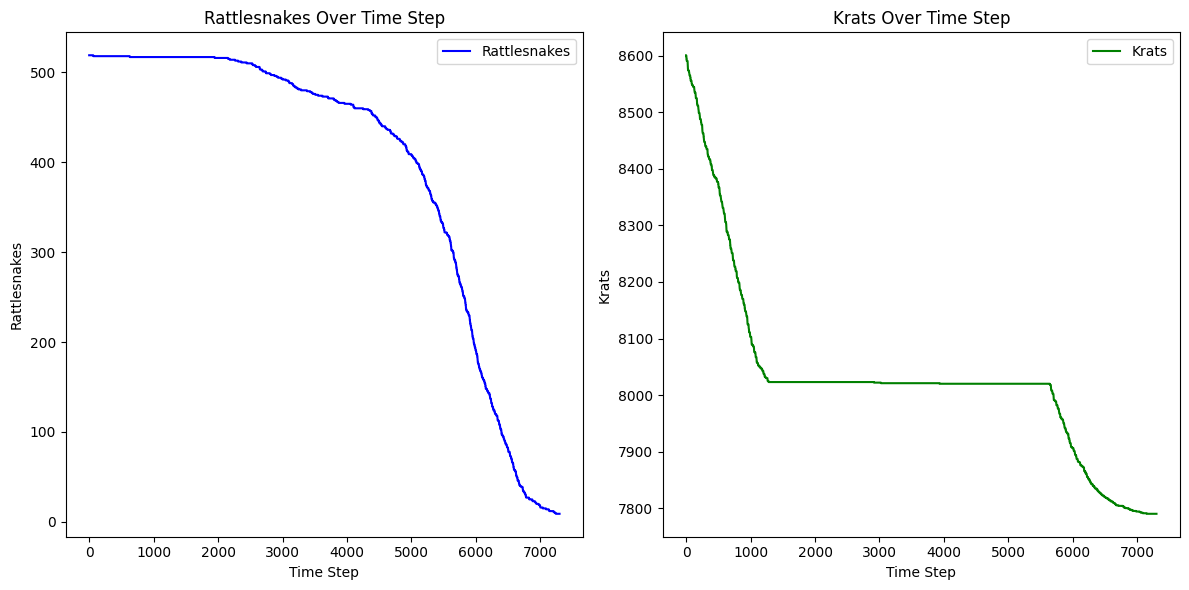

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot Rattlesnakes on the left (ax1)
ax1.plot(df_pop["Step_ID"], df_pop["Rattlesnakes"], label="Rattlesnakes", color="blue")
ax1.set_title("Rattlesnakes Over Time Step")
ax1.set_xlabel("Time Step")
ax1.set_ylabel("Rattlesnakes")
ax1.legend()

# Plot Krats on the right (ax2)
ax2.plot(df_pop["Step_ID"], df_pop["Krats"], label="Krats", color="green")
ax2.set_title("Krats Over Time Step")
ax2.set_xlabel("Time Step")
ax2.set_ylabel("Krats")
ax2.legend()

# Show plot
plt.tight_layout()
plt.show()

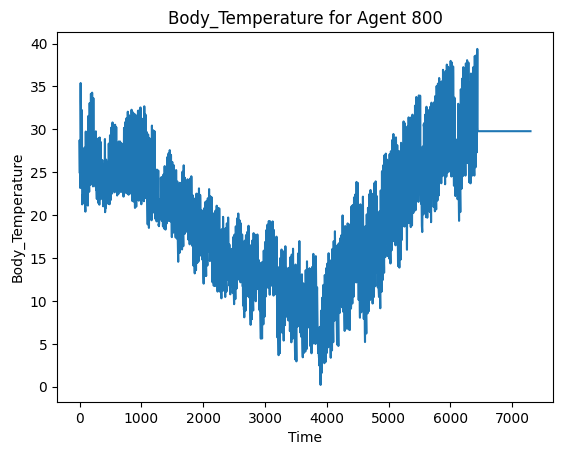

In [6]:
## Single snake
# Filter for the agent with ID 800
single_snake = df[df["Agent_ID"] == 14]

# Extract columns as Numpy arrays
time = single_snake["Time_Step"]
values = single_snake["Body_Temperature"]

# Plot using Matplotlib
plt.plot(time, values)
plt.xlabel("Time")
plt.ylabel("Body_Temperature")
plt.title("Body_Temperature for Agent 800")
plt.show()


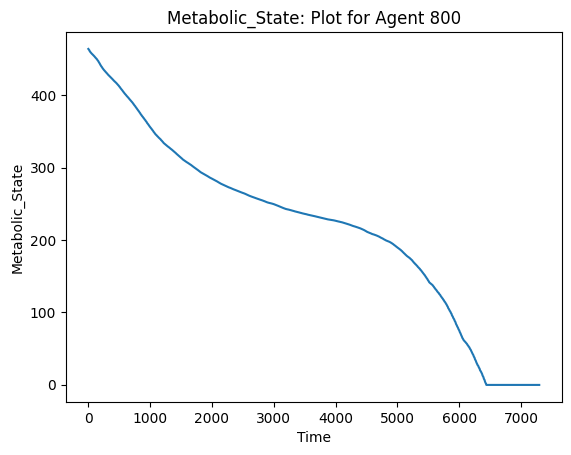

In [7]:
# Extract columns as Numpy arrays
time = single_snake["Time_Step"].to_numpy()
values = single_snake["Metabolic_State"].to_numpy()

# Plot using Matplotlib
plt.plot(time, values)
plt.xlabel("Time")
plt.ylabel("Metabolic_State")
plt.title("Metabolic_State: Plot for Agent 800")
plt.show()

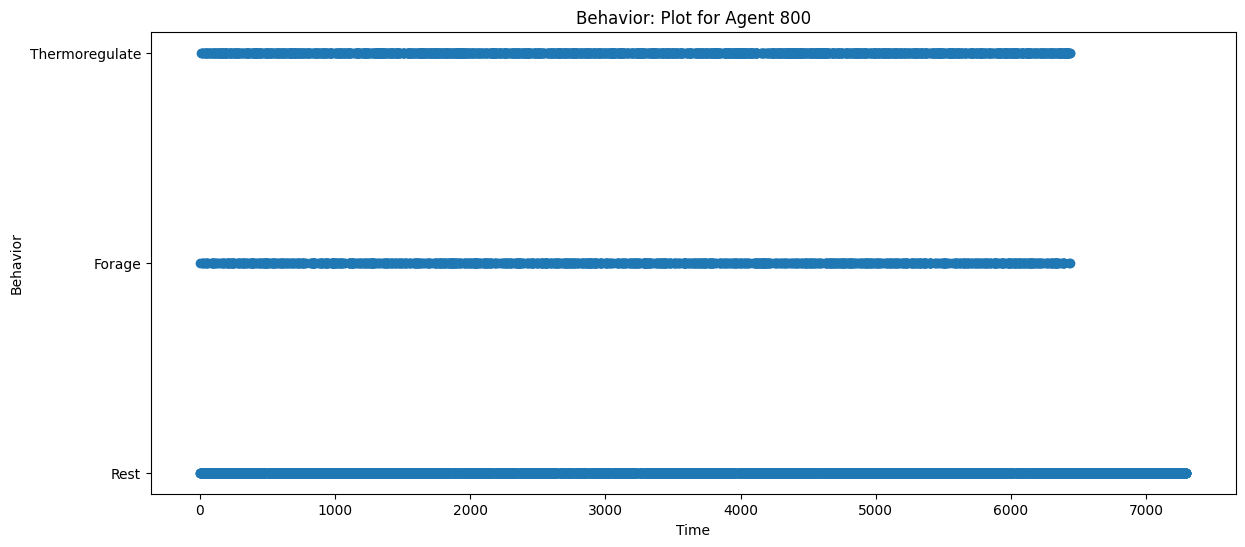

In [8]:
# Extract columns as Numpy arrays
single_snake = single_snake.dropna()
time = single_snake["Time_Step"]
values = single_snake["Behavior"]

# Plot using Matplotlib
plt.figure(figsize=(14, 6))
plt.scatter(time, values)
plt.xlabel("Time")
plt.ylabel("Behavior")
plt.title("Behavior: Plot for Agent 800")
plt.show()

In [4]:
df_pd = df.sort_values(by=["Agent_ID", "Time_Step"])

# Now you can proceed with the Pandas approach
import pandas as pd

# Shift the 'Behavior' column within each agent group to get the previous behavior
df_pd['previous_state'] = df_pd.groupby("Agent_ID")['Behavior'].shift(1)

# Filter out rows where the previous state is null (i.e., the first time step for each agent)
df_filtered = df_pd[df_pd['previous_state'].notnull()]

# Count transitions
transitions = df_filtered.groupby(["previous_state", "Behavior"]).size().reset_index(name="transition_count")

# Calculate total transitions from each previous state
total_transitions = transitions.groupby("previous_state")["transition_count"].sum().reset_index(name="total_transitions")

# Merge to get transition probabilities
transition_probabilities = transitions.merge(total_transitions, on="previous_state")
transition_probabilities["transition_probability"] = (
    transition_probabilities["transition_count"] / transition_probabilities["total_transitions"]
)

print(transition_probabilities)

   previous_state        Behavior  transition_count  total_transitions  \
0          Forage          Forage            289704             748462   
1          Forage            Rest            287181             748462   
2          Forage  Thermoregulate            171577             748462   
3            Rest          Forage            286657            1876967   
4            Rest            Rest           1159366            1876967   
5            Rest  Thermoregulate            430944            1876967   
6  Thermoregulate          Forage            172095            1161195   
7  Thermoregulate            Rest            430427            1161195   
8  Thermoregulate  Thermoregulate            558673            1161195   

   transition_probability  
0                0.387066  
1                0.383695  
2                0.229239  
3                0.152724  
4                0.617681  
5                0.229596  
6                0.148205  
7                0.370676  
8      

In [12]:
heatmap_data.head()

Behavior,Forage,Rest,Thermoregulate
previous_state,,,
Forage,0.387066,0.383695,0.229239
Rest,0.152724,0.617681,0.229596
Thermoregulate,0.148205,0.370676,0.481119


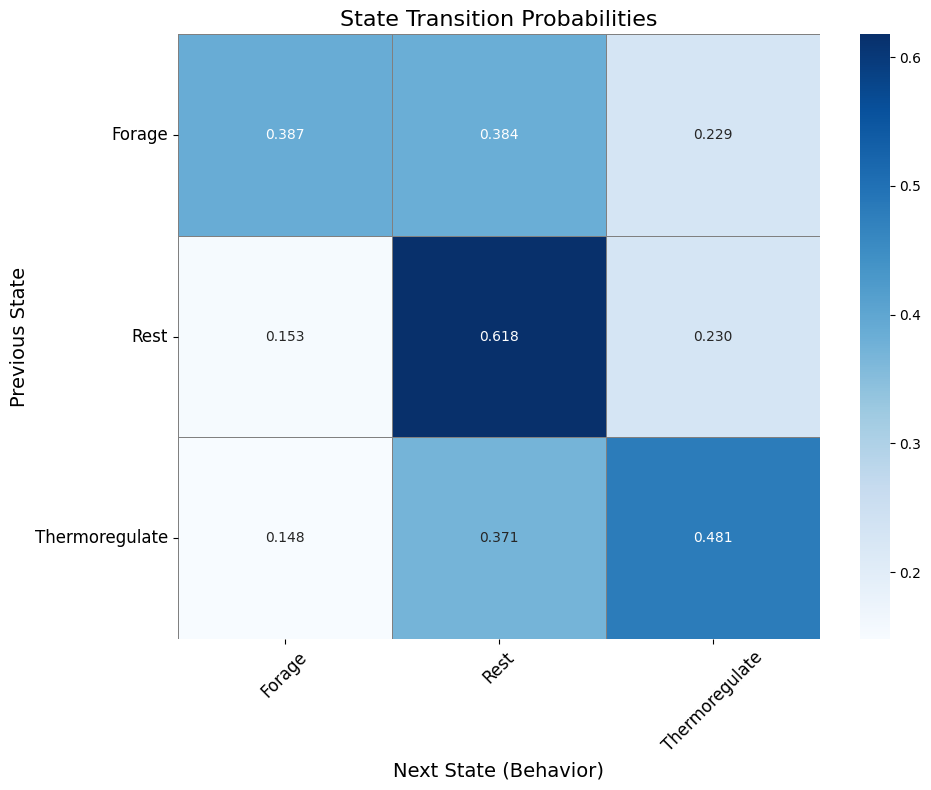

In [ ]:
# This could be a good test
import seaborn as sns

heatmap_data = transition_probabilities.pivot(index="previous_state", columns="Behavior", values="transition_probability")

plt.figure(figsize=(10, 8))  # Adjust figure size
sns.heatmap(
    heatmap_data, 
    annot=True,                # Enable annotations
    fmt=".2f",                 # Show values with 3 decimal precision
    cmap="Blues",              # Use a visually clear colormap
    annot_kws={"size": 10},    # Adjust annotation size
    linewidths=0.5,            # Add gridlines
    linecolor="gray"           # Set gridline color
)
plt.title("State Transition Probabilities", fontsize=16)
plt.xlabel("Next State (Behavior)", fontsize=14)
plt.ylabel("Previous State", fontsize=14)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels
plt.yticks(rotation=0, fontsize=12)   # Keep y-axis labels horizontal
plt.tight_layout()  # Ensure layout is clean
plt.show()

In [6]:
########### Microhabitat
df_pd = df.sort_values(by=["Agent_ID", "Time_Step"])

# Now you can proceed with the Pandas approach
import pandas as pd

# Shift the 'Behavior' column within each agent group to get the previous behavior
df_pd['previous_state'] = df_pd.groupby("Agent_ID")['Microhabitat'].shift(1)

# Filter out rows where the previous state is null (i.e., the first time step for each agent)
df_filtered = df_pd[df_pd['previous_state'].notnull()]

# Count transitions
transitions = df_filtered.groupby(["previous_state", "Microhabitat"]).size().reset_index(name="transition_count")

# Calculate total transitions from each previous state
total_transitions = transitions.groupby("previous_state")["transition_count"].sum().reset_index(name="total_transitions")

# Merge to get transition probabilities
transition_probabilities = transitions.merge(total_transitions, on="previous_state")
transition_probabilities["transition_probability"] = (
    transition_probabilities["transition_count"] / transition_probabilities["total_transitions"]
)

print(transition_probabilities)

  previous_state Microhabitat  transition_count  total_transitions  \
0         Burrow       Burrow           1800132            2452802   
1         Burrow         Open            652670            2452802   
2           Open       Burrow            652664            1333822   
3           Open         Open            681158            1333822   

   transition_probability  
0                0.733908  
1                0.266092  
2                0.489319  
3                0.510681  


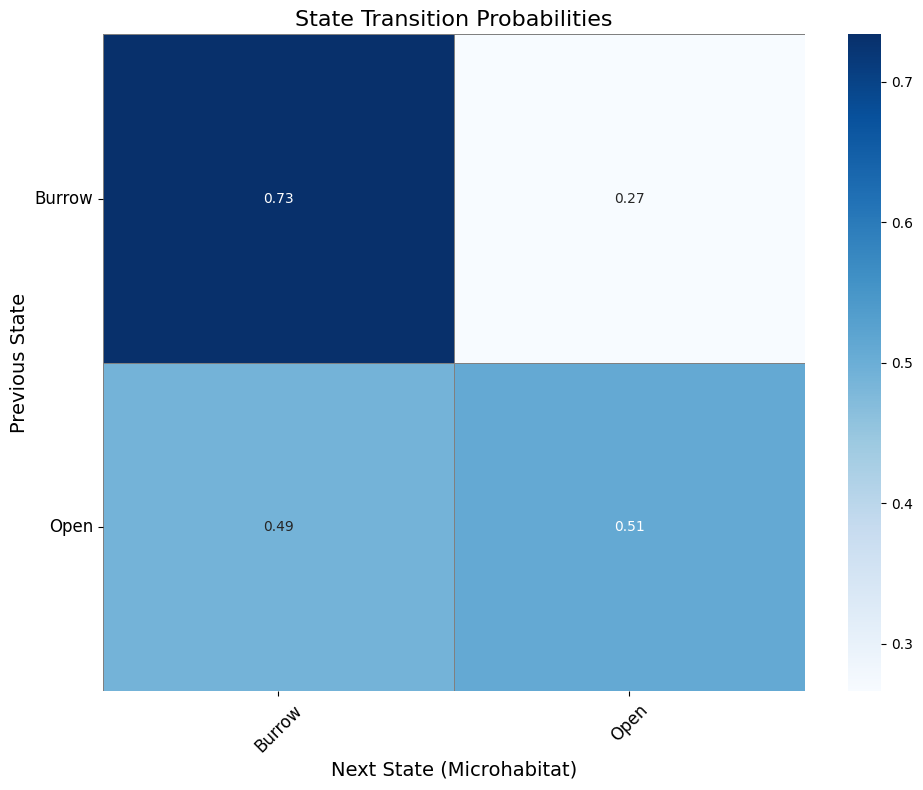

In [7]:
heatmap_data = transition_probabilities.pivot(index="previous_state", columns="Microhabitat", values="transition_probability")

plt.figure(figsize=(10, 8))  # Adjust figure size
sns.heatmap(
    heatmap_data, 
    annot=True,                # Enable annotations
    fmt=".2f",                 # Show values with 3 decimal precision
    cmap="Blues",              # Use a visually clear colormap
    annot_kws={"size": 10},    # Adjust annotation size
    linewidths=0.5,            # Add gridlines
    linecolor="gray"           # Set gridline color
)
plt.title("State Transition Probabilities", fontsize=16)
plt.xlabel("Next State (Microhabitat)", fontsize=14)
plt.ylabel("Previous State", fontsize=14)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels
plt.yticks(rotation=0, fontsize=12)   # Keep y-axis labels horizontal
plt.tight_layout()  # Ensure layout is clean
plt.show()